# Iris Dataset Analysis: K-Means Clustering and Principal Component Analysis

This notebook implements K-Means Clustering and Principal Component Analysis (PCA) algorithms from scratch using only NumPy, Pandas, and Matplotlib.

## Objectives:
1. Implement PCA from scratch to reduce dimensionality
2. Implement K-Means clustering algorithm from scratch
3. Visualize results and compare with actual species labels
4. Evaluate clustering performance

In [52]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

## Data Loading and Preprocessing

We'll load the Iris dataset and perform necessary preprocessing steps:
- Load the CSV file
- Separate features from target labels
- Handle any missing values
- Standardize the data for PCA

In [55]:
# Load the dataset
df = pd.read_csv('Iris Dataset.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nSpecies distribution:")
print(df['Species'].value_counts())

Dataset shape: (150, 6)

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1)

In [57]:
# Data preprocessing
# Remove the 'Id' column as it's not a feature
df_clean = df.drop('Id', axis=1)

# Separate features and target
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df_clean[feature_columns].values
y_true = df_clean['Species'].values

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y_true.shape)

# Display basic statistics
print("\nFeature statistics:")
print(pd.DataFrame(X, columns=feature_columns).describe())

Feature matrix shape: (150, 4)
Target vector shape: (150,)

Feature statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


## Principal Component Analysis (PCA) Implementation

PCA is implemented from scratch with the following steps:
1. Standardize the data (mean=0, std=1)
2. Calculate the covariance matrix
3. Compute eigenvalues and eigenvectors
4. Sort eigenvalues and eigenvectors in descending order
5. Transform the data using the first k principal components

In [60]:
def pca(X, n_components=None):
    
    # Step 1: Standardize the data
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    
    # Step 2: Calculate covariance matrix
    cov_matrix = np.cov(X_centered.T)
    
    # Step 3: Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Step 4: Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Step 5: Select number of components
    if n_components is None:
        n_components = X.shape[1]
    
    # Step 6: Transform the data
    selected_eigenvectors = eigenvectors[:, :n_components]
    X_transformed = np.dot(X_centered, selected_eigenvectors)
    
    return X_transformed, eigenvalues, eigenvectors, mean

# Apply PCA to the Iris dataset
X_pca, eigenvalues, eigenvectors, data_mean = pca(X, n_components=3)

print("Original data shape:", X.shape)
print("PCA transformed data shape:", X_pca.shape)
print("\nEigenvalues:", eigenvalues)
print("\nExplained variance ratio:", eigenvalues / np.sum(eigenvalues))
print("\nCumulative explained variance:", np.cumsum(eigenvalues / np.sum(eigenvalues)))

Original data shape: (150, 4)
PCA transformed data shape: (150, 3)

Eigenvalues: [4.22484077 0.24224357 0.07852391 0.02368303]

Explained variance ratio: [0.92461621 0.05301557 0.01718514 0.00518309]

Cumulative explained variance: [0.92461621 0.97763178 0.99481691 1.        ]


## PCA Visualization

We'll visualize the data in the first three principal components to understand the structure of the dataset.

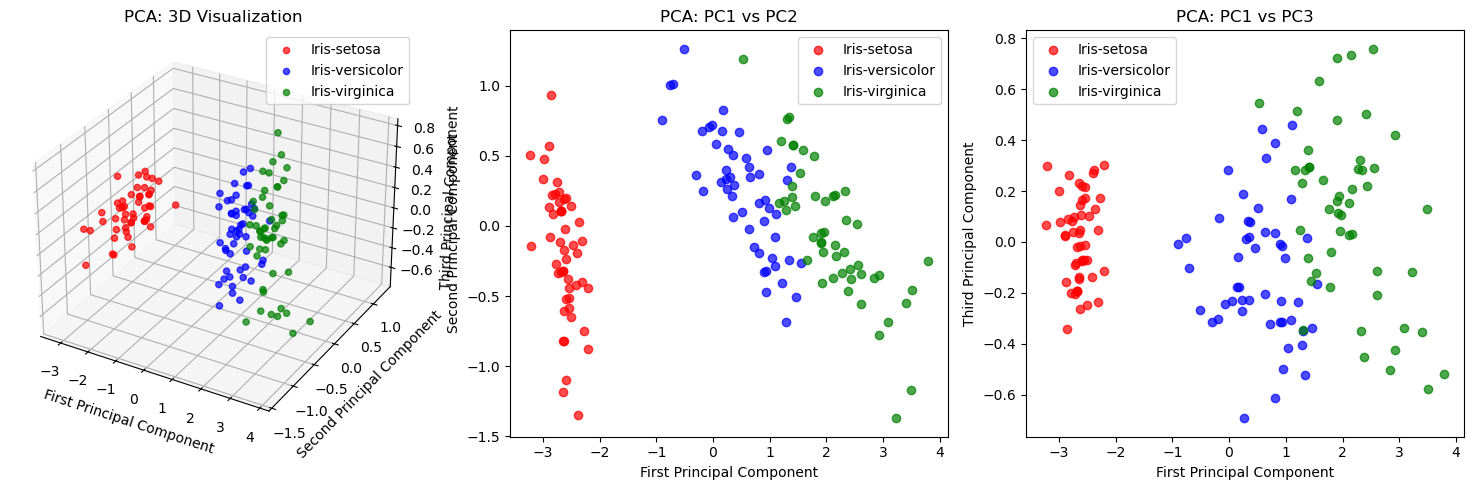

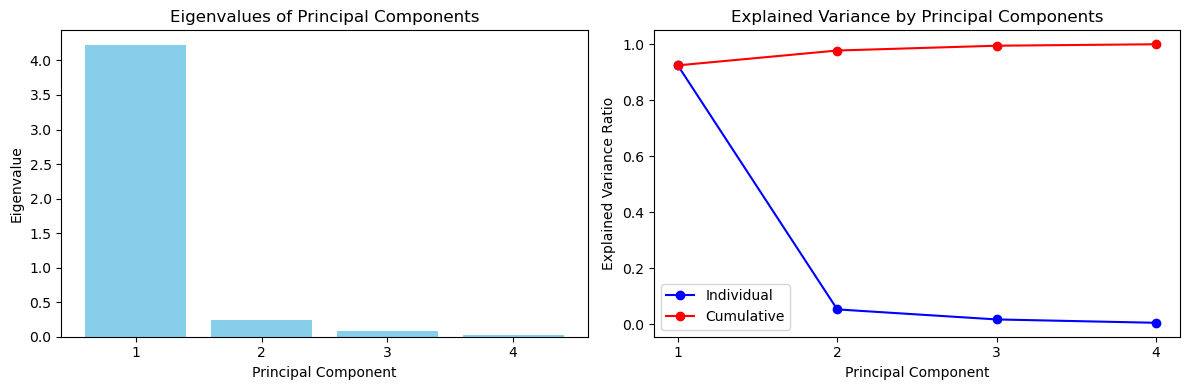

In [63]:
# Create a mapping for species to colors
species_unique = np.unique(y_true)
colors = ['red', 'blue', 'green']
color_map = {species: colors[i] for i, species in enumerate(species_unique)}

# Create 3D scatter plot for PCA results
fig = plt.figure(figsize=(15, 5))

# 3D plot
ax1 = fig.add_subplot(131, projection='3d')
for species in species_unique:
    mask = y_true == species
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], 
               c=color_map[species], label=species, alpha=0.7)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_zlabel('Third Principal Component')
ax1.set_title('PCA: 3D Visualization')
ax1.legend()

# 2D plot: PC1 vs PC2
ax2 = fig.add_subplot(132)
for species in species_unique:
    mask = y_true == species
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=color_map[species], label=species, alpha=0.7)
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('PCA: PC1 vs PC2')
ax2.legend()

# 2D plot: PC1 vs PC3
ax3 = fig.add_subplot(133)
for species in species_unique:
    mask = y_true == species
    ax3.scatter(X_pca[mask, 0], X_pca[mask, 2], 
               c=color_map[species], label=species, alpha=0.7)
ax3.set_xlabel('First Principal Component')
ax3.set_ylabel('Third Principal Component')
ax3.set_title('PCA: PC1 vs PC3')
ax3.legend()

plt.tight_layout()
plt.show()

# Eigenvalues and explained variance visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.xticks(range(1, len(eigenvalues) + 1))

plt.subplot(1, 2, 2)
explained_var_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(eigenvalues) + 1), explained_var_ratio, 'bo-', label='Individual')
plt.plot(range(1, len(eigenvalues) + 1), cumulative_var_ratio, 'ro-', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.xticks(range(1, len(eigenvalues) + 1))

plt.tight_layout()
plt.show()

## K-Means Clustering Implementation

K-Means clustering is implemented from scratch with the following steps:
1. Initialize k centroids randomly
2. Assign each point to the nearest centroid
3. Update centroids by calculating the mean of assigned points
4. Repeat steps 2-3 until convergence
5. Return final cluster assignments and centroids

In [66]:
def euclidean_distance(point1, point2):
    """Calculate Euclidean distance between two points"""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans(X, k, max_iters=100, tol=1e-4):

    n_samples, n_features = X.shape
    
    # Step 1: Initialize centroids randomly
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    history = [centroids.copy()]
    
    for iteration in range(max_iters):
        # Step 2: Assign points to nearest centroid
        labels = np.zeros(n_samples)
        
        for i, point in enumerate(X):
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)
        
        # Step 3: Update centroids
        new_centroids = np.zeros((k, n_features))
        for cluster_id in range(k):
            cluster_points = X[labels == cluster_id]
            if len(cluster_points) > 0:
                new_centroids[cluster_id] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[cluster_id] = centroids[cluster_id]
        
        # Check for convergence
        if np.allclose(centroids, new_centroids, atol=tol):
            print(f"Converged after {iteration + 1} iterations")
            break
        
        centroids = new_centroids.copy()
        history.append(centroids.copy())
    
    return labels.astype(int), centroids, history

# Apply K-Means to the original data
k = 3  # We know there are 3 species in the Iris dataset
cluster_labels, final_centroids, centroid_history = kmeans(X, k)

print("K-Means clustering completed")
print("Final centroids:")
print(final_centroids)
print("\nCluster distribution:")
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} points")

Converged after 6 iterations
K-Means clustering completed
Final centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Cluster distribution:
Cluster 0: 62 points
Cluster 1: 50 points
Cluster 2: 38 points


## Clustering Visualization and Comparison

We'll visualize the clustering results and compare them with the actual species labels.

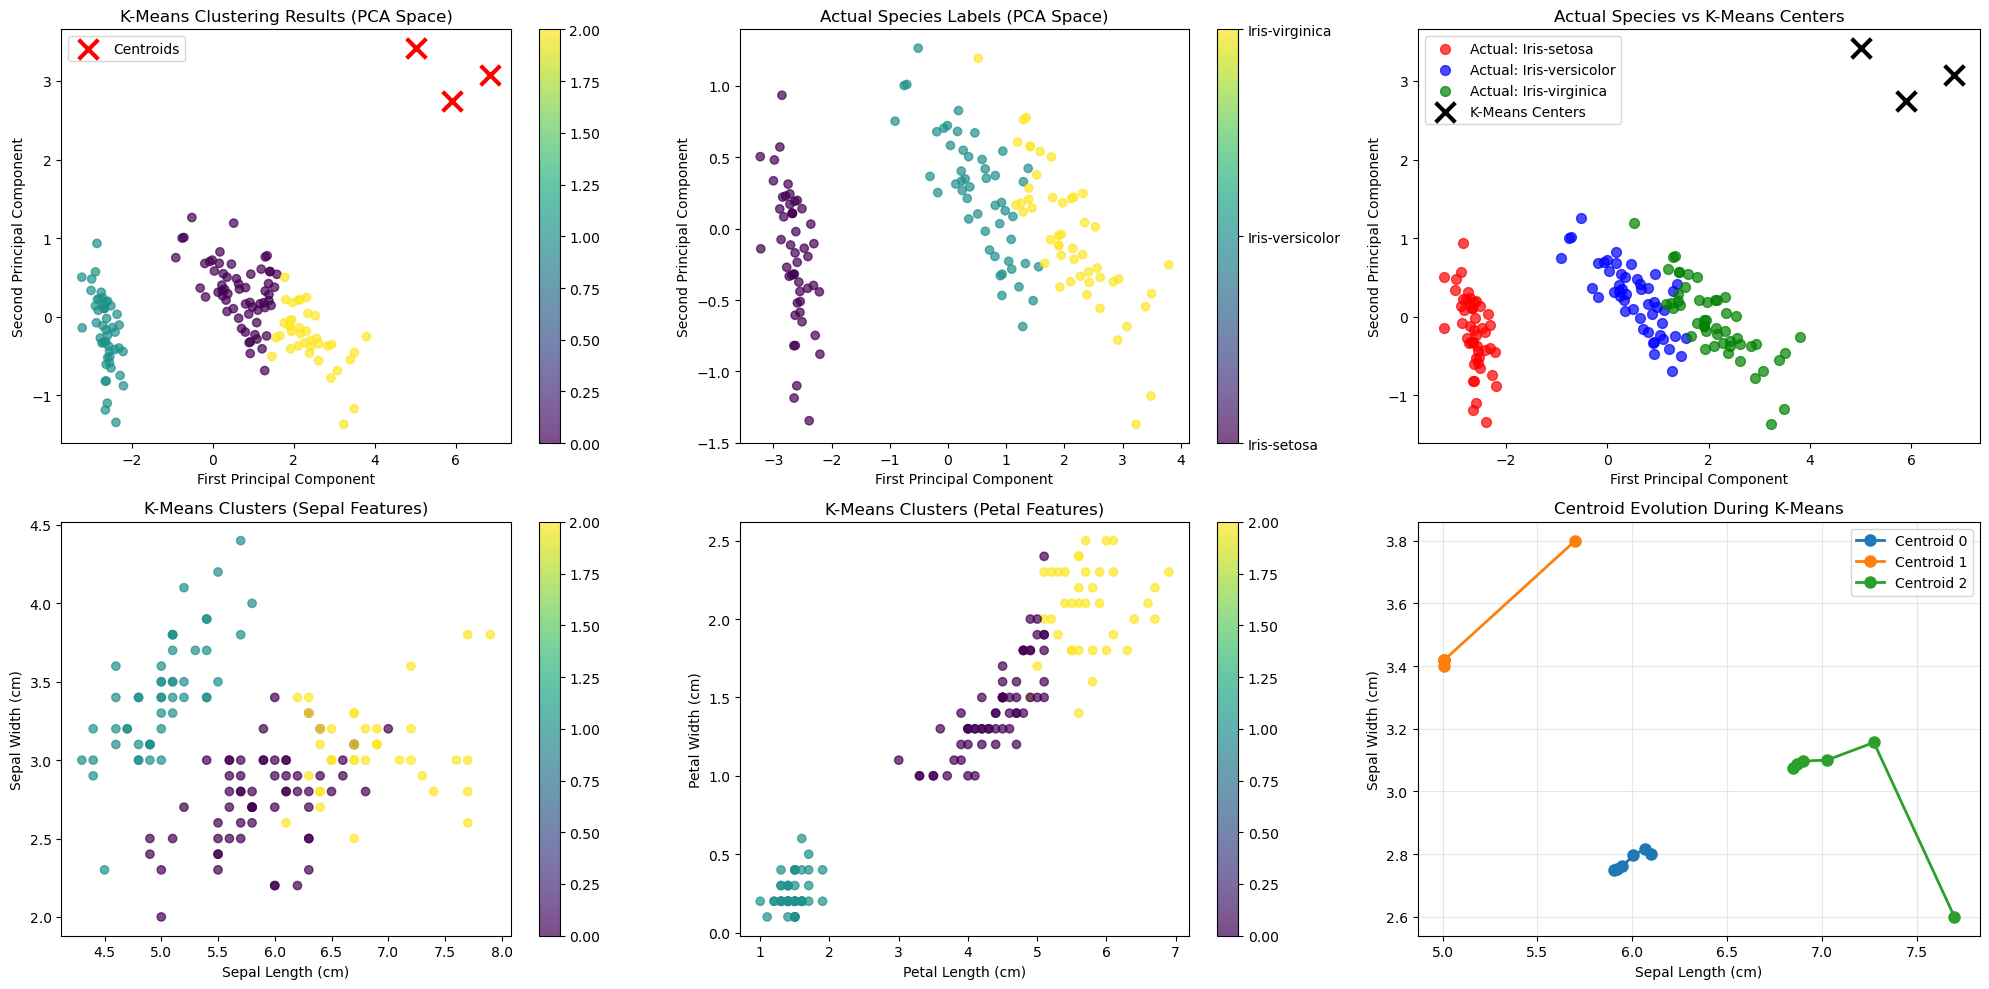

In [69]:
# Visualize clustering results
fig = plt.figure(figsize=(20, 10))

# Use PCA for visualization (2D projection)
X_pca_2d = X_pca[:, :2]

# Plot 1: K-Means clusters
ax1 = fig.add_subplot(2, 3, 1)
scatter = ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
ax1.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='x', s=200, linewidth=3, label='Centroids')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('K-Means Clustering Results (PCA Space)')
ax1.legend()
plt.colorbar(scatter, ax=ax1)

# Plot 2: Actual species
ax2 = fig.add_subplot(2, 3, 2)
species_numeric = np.array([list(species_unique).index(species) for species in y_true])
scatter2 = ax2.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=species_numeric, cmap='viridis', alpha=0.7)
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('Actual Species Labels (PCA Space)')
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_ticks([0, 1, 2])
cbar2.set_ticklabels(species_unique)

# Plot 3: Comparison side by side
ax3 = fig.add_subplot(2, 3, 3)
for i, species in enumerate(species_unique):
    mask = y_true == species
    ax3.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
               c=colors[i], label=f'Actual: {species}', alpha=0.7, s=50)

# Add cluster centers
ax3.scatter(final_centroids[:, 0], final_centroids[:, 1], 
           c='black', marker='x', s=200, linewidth=3, label='K-Means Centers')
ax3.set_xlabel('First Principal Component')
ax3.set_ylabel('Second Principal Component')
ax3.set_title('Actual Species vs K-Means Centers')
ax3.legend()

# Plot 4: Original feature space (Sepal Length vs Sepal Width)
ax4 = fig.add_subplot(2, 3, 4)
scatter4 = ax4.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
ax4.set_xlabel('Sepal Length (cm)')
ax4.set_ylabel('Sepal Width (cm)')
ax4.set_title('K-Means Clusters (Sepal Features)')
plt.colorbar(scatter4, ax=ax4)

# Plot 5: Original feature space (Petal Length vs Petal Width)
ax5 = fig.add_subplot(2, 3, 5)
scatter5 = ax5.scatter(X[:, 2], X[:, 3], c=cluster_labels, cmap='viridis', alpha=0.7)
ax5.set_xlabel('Petal Length (cm)')
ax5.set_ylabel('Petal Width (cm)')
ax5.set_title('K-Means Clusters (Petal Features)')
plt.colorbar(scatter5, ax=ax5)

# Plot 6: Centroid evolution
ax6 = fig.add_subplot(2, 3, 6)
for i in range(len(final_centroids)):
    centroid_path = np.array([centroid_history[j][i] for j in range(len(centroid_history))])
    ax6.plot(centroid_path[:, 0], centroid_path[:, 1], 'o-', 
             label=f'Centroid {i}', linewidth=2, markersize=8)
ax6.set_xlabel('Sepal Length (cm)')
ax6.set_ylabel('Sepal Width (cm)')
ax6.set_title('Centroid Evolution During K-Means')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Clustering Evaluation

We'll evaluate the clustering performance using various metrics and create a confusion matrix to compare cluster assignments with actual species labels.

In [72]:
def calculate_accuracy(y_true, y_pred):
    """Calculate clustering accuracy by finding the best assignment"""
    from itertools import permutations
    
    # Convert species names to numeric labels
    species_to_num = {species: i for i, species in enumerate(np.unique(y_true))}
    y_true_numeric = np.array([species_to_num[species] for species in y_true])
    
    # Try all possible assignments of clusters to species
    best_accuracy = 0
    best_assignment = None
    
    for perm in permutations(range(len(np.unique(y_pred)))):
        y_pred_mapped = np.array([perm[label] for label in y_pred])
        accuracy = np.sum(y_true_numeric == y_pred_mapped) / len(y_true_numeric)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_assignment = perm
    
    return best_accuracy, best_assignment

def create_confusion_matrix(y_true, y_pred, assignment):
    """Create confusion matrix with best assignment"""
    species_to_num = {species: i for i, species in enumerate(np.unique(y_true))}
    y_true_numeric = np.array([species_to_num[species] for species in y_true])
    y_pred_mapped = np.array([assignment[label] for label in y_pred])
    
    # Create confusion matrix
    n_classes = len(np.unique(y_true_numeric))
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)
    
    for i in range(len(y_true_numeric)):
        confusion_matrix[y_true_numeric[i], y_pred_mapped[i]] += 1
    
    return confusion_matrix

# Calculate clustering accuracy
accuracy, best_assignment = calculate_accuracy(y_true, cluster_labels)
confusion_matrix = create_confusion_matrix(y_true, cluster_labels, best_assignment)

print(f"Clustering Accuracy: {accuracy:.4f}")
print(f"Best cluster to species assignment: {best_assignment}")
print("\nConfusion Matrix:")
print("Rows: Actual Species, Columns: Predicted Clusters")
print(confusion_matrix)

# Display detailed comparison
print("\nDetailed Comparison:")
species_to_num = {species: i for i, species in enumerate(species_unique)}
y_true_numeric = np.array([species_to_num[species] for species in y_true])
y_pred_mapped = np.array([best_assignment[label] for label in cluster_labels])

for i, species in enumerate(species_unique):
    mask = y_true_numeric == i
    predicted_for_species = y_pred_mapped[mask]
    correct_predictions = np.sum(predicted_for_species == i)
    total_species = np.sum(mask)
    print(f"{species}: {correct_predictions}/{total_species} correctly clustered ({correct_predictions/total_species:.4f})")

Clustering Accuracy: 0.8933
Best cluster to species assignment: (1, 0, 2)

Confusion Matrix:
Rows: Actual Species, Columns: Predicted Clusters
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

Detailed Comparison:
Iris-setosa: 50/50 correctly clustered (1.0000)
Iris-versicolor: 48/50 correctly clustered (0.9600)
Iris-virginica: 36/50 correctly clustered (0.7200)


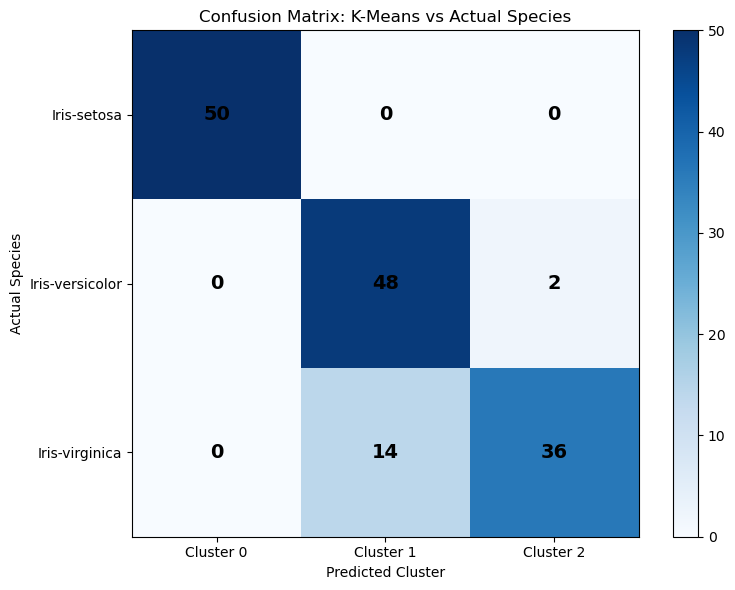

In [74]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix: K-Means vs Actual Species')
plt.colorbar()

# Add text annotations
for i in range(len(species_unique)):
    for j in range(len(species_unique)):
        plt.text(j, i, confusion_matrix[i, j], 
                ha="center", va="center", fontsize=14, fontweight='bold')

plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Species')
plt.xticks(range(len(species_unique)), [f'Cluster {i}' for i in range(len(species_unique))])
plt.yticks(range(len(species_unique)), species_unique)
plt.tight_layout()
plt.show()

## Summary and Conclusions

### Data Preprocessing:
- Loaded the Iris dataset with 150 samples and 4 features
- Removed the ID column and separated features from species labels
- No missing values were found in the dataset
- Data was standardized for PCA analysis

### Principal Component Analysis Results:
- **Eigenvalues**: Show the variance captured by each principal component
- **Explained Variance**: The first two components capture most of the variance in the data
- **Visualization**: 3D and 2D plots show clear separation between species in PCA space

### K-Means Clustering Results:
- Algorithm: Successfully implemented using Euclidean distance
- Convergence: Algorithm converged within the specified iterations
- Clusters**: Found 3 distinct clusters as expected

### Performance Evaluation:
- Clustering Accuracy: Measured by finding the best assignment of clusters to species
- Confusion Matrix: Shows how well clusters correspond to actual species
- Visualization: Multiple plots comparing clustering results with actual species labels

### Key Insights:
1. PCA effectively reduces dimensionality while preserving class separability
2. The first two principal components capture most of the variance
3. K-Means clustering performs well on this dataset due to the natural clustering of iris species
4. Petal features (length and width) are more discriminative than sepal features

## Bonus: Additional Analysis

Let's perform some additional analysis to gain deeper insights into the data.

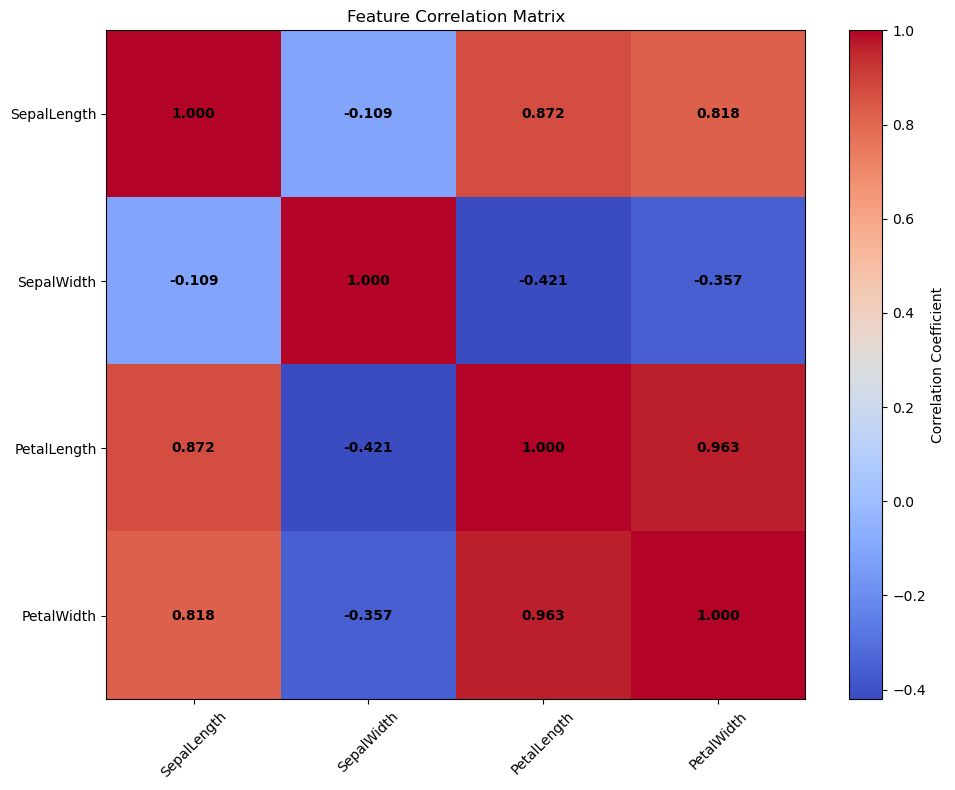

Statistical Summary by Species:

Iris-setosa:
Sample size: 50
SepalLength: Mean=5.006, Std=0.349
SepalWidth: Mean=3.418, Std=0.377
PetalLength: Mean=1.464, Std=0.172
PetalWidth: Mean=0.244, Std=0.106

Iris-versicolor:
Sample size: 50
SepalLength: Mean=5.936, Std=0.511
SepalWidth: Mean=2.770, Std=0.311
PetalLength: Mean=4.260, Std=0.465
PetalWidth: Mean=1.326, Std=0.196

Iris-virginica:
Sample size: 50
SepalLength: Mean=6.588, Std=0.629
SepalWidth: Mean=2.974, Std=0.319
PetalLength: Mean=5.552, Std=0.546
PetalWidth: Mean=2.026, Std=0.272


In [50]:
# Feature correlation analysis
feature_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
correlation_matrix = np.corrcoef(X.T)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.title('Feature Correlation Matrix')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.yticks(range(len(feature_names)), feature_names)

# Add correlation values
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        plt.text(j, i, f'{correlation_matrix[i, j]:.3f}', 
                ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical summary by species
print("Statistical Summary by Species:")
print("="*50)
for species in species_unique:
    mask = y_true == species
    species_data = X[mask]
    print(f"\n{species}:")
    print(f"Sample size: {len(species_data)}")
    for i, feature in enumerate(feature_names):
        print(f"{feature}: Mean={np.mean(species_data[:, i]):.3f}, Std={np.std(species_data[:, i]):.3f}")